In [1]:
# Notebook adapted from Jeremy P. Howard

In [16]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [17]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

<p>Square error is square of difference between predicted and actual data values</p>
Define predicted: ${\hat y} $ and actual:${y}$ 
<p>Loss is:</p>
$({\hat y}-{y})^2$
<p>Previous definition y as linear_function</p>
${\hat y=\alpha + \beta x}$
<p>To minmize the Loss we take the derivative of the loss wrt alpha and beta, not x. x and y are datapoints
which is our dataset we are trying to fit to. The derivative of y is the sum of the partial derivatives of the dependent variables
which in this case are alpha and beta. </p>
<p></p>
$derivative(loss)=\cfrac{\partial(loss)}{\partial \alpha} + \cfrac{\partial(loss)}{\partial \beta}$
<p></p>
$\cfrac{\partial(loss)}{\partial \alpha}=\cfrac{(\hat y - y)^2}{\partial \alpha}=\cfrac{2*(\hat y-y)*\partial(\hat y - y)}{\partial \alpha}$
<p>Using:</p>
$\cfrac{\partial \hat y}{\partial \alpha}=1$ 
<p>and</p>
$\cfrac{\partial y}{\partial \alpha}=0$
<p>the derivative of loss wrt alpha for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \alpha}=2(\hat y-y)$
<p>The derivative of loss WRT beta starts as:</p>  
$\cfrac{\partial(loss)}{\partial \beta}=\cfrac{(\hat y - y)^2}{\partial \beta}=\cfrac{2*(\hat y-y)}{\partial \beta}*\cfrac{\partial(\hat y -y)}{\partial \beta}$
<p></p>
$\cfrac{\partial \hat y}{\partial \beta}=x$ and
$\cfrac{\partial y}{\partial \beta}=0$
<p>the derivative of loss wrt beta for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \beta}=2x*(\hat y-y)$


In [18]:
def update_alpha_and_beta():
    global alpha, beta
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
# i is the frame nuber!
#https://math.unice.fr/~hheumann/Tutorial/_build/intro_matplotlib.html
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

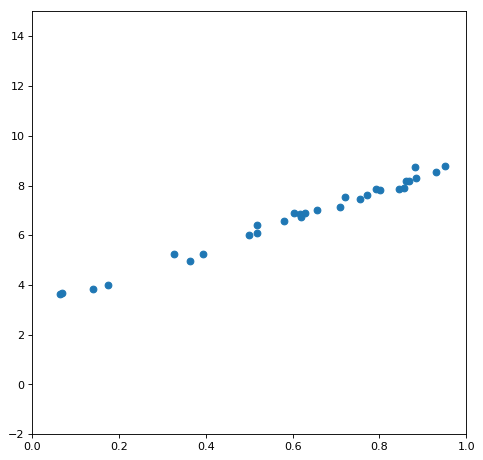

In [19]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [20]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [21]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

In [22]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('mp4_animations/linear_animation.mp4', writer=writer)

In [ ]:
print('Done linear animation')

$y=\gamma x^2 + \beta x + \alpha$
<p></p>
$\cfrac{\partial(loss)}{\partial \gamma}=2x^2(\hat y-y)$
$\cfrac{\partial(loss)}{\partial \beta}=2x(\hat y -y)$
$\cfrac{\partial(loss)}{\partial \alpha}=2(\hat y-y)$


<h6>Squared Function</h6>

In [10]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic
def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

beta_true = 2.0
alpha_true = 2.0
gamma_true = 10.0

n = 300
x = random(n)
y = square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01

In [11]:
def update_squared():
    global gamma, alpha, beta
    y_predicted = square_function(gamma,beta,alpha,x)
    derivative_of_loss_wrt_gamma = 2*(x**2)*(y_predicted-y)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate * derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = square_function(gamma,beta,alpha,x)
    line.set_data(x,y)
    for i in range(20): 
        update_squared()
    return (line,)

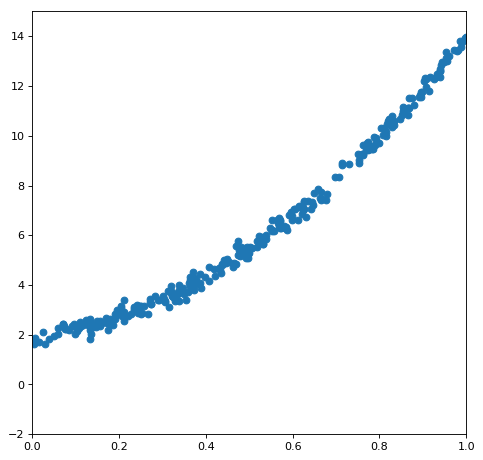

In [12]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [13]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [14]:
#%matplotlib inline
resulting_animation

In [15]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('mp4_animations/squared_animation.mp4', writer=writer)

In [14]:
print('Done squared animation')

Done squared animation


<h6>GD w/momentum</h6>
The problem with SGD is convergence speed. To speed up the convergence or time to target we can remove the
oscillations we typically see in SGD. To do this when we update the parameters $\theta$ by {\theta_v}, and the $\theta_v$ term
has a momentum term in it. Momentum is an exponentially weighted
average of the gradients and is almost always faster than SGD. The gradient oscillatoins
prevent using a larger learning rate to avoid overshooting. From Andrew Ng the diagram below shows convergence toward
the center of the ellipse. The red line is momentum. The blue lines are gradient descent wo momentum. Another interpretation 
is to look at momemntum reducing the vertical shifts and allowing the horizontal component to continue as the gradient
converges to the center. 
<img src="files/ng_mom.png">
The general equations for updating parameters using momentum are: 
    <p>$\theta=\theta+\theta_v$</p> and <p>$\theta_v = \gamma v_{\theta}-\alpha \nabla_{theta}$</p>
where $\gamma$ is the momentum term typically set
to 0.9, $\alpha$ is the learning rate. Our equations for our loss function are in alpha and beta and for momentum are:
    <p>$\alpha=\alpha+v_{\alpha}, \beta=\beta+v_{\beta}$</p> 
    <p>$v_{\alpha} = \gamma v_{\alpha} - \alpha_{lr} \nabla_{\alpha} ,
    v_{\beta} = \gamma v_{\beta} - \alpha_{lr} \nabla_{\beta} $</p> where $\gamma$ is the momentum and $\alpha_{lr}$ is the learning rate

In [ ]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [ ]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01
initial_velocity=0.1

mom=0.9
v_alpha = 0
v_beta = 0

In [ ]:
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #more efficient code w/o the loop bc it is vectorized
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x * derivative_of_loss_wrt_alpha
    v_alpha = mom*v_alpha - np.mean(learning_rate*derivative_of_loss_wrt_alpha)
    v_beta = mom*v_beta - np.mean(learning_rate*derivative_of_loss_wrt_beta)
    alpha = alpha + v_alpha
    beta = beta + v_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('mp4_animations/GD_w_mom_animation.mp4', writer=writer)

<h6>Test Vectorized mean</h6>



In [ ]:
# nonvectorized version. do not do this. 
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #more efficient code w/o the loop bc it is vectorized
    for i in range(n):
        y_predicted = linear_function(alpha,beta,x[i])
        derivative_of_loss_wrt_alpha = 2*(y_predicted-y[i])
        derivative_of_loss_wrt_beta = x[i] * derivative_of_loss_wrt_alpha
        v_alpha = mom*v_alpha - (1/n)*learning_rate*derivative_of_loss_wrt_alpha
        v_beta = mom*v_beta - (1/n)*learning_rate*derivative_of_loss_wrt_beta 
    alpha = alpha + v_alpha
    beta = beta + v_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
#all the code I see on blogs are wrong. Only JH got it right. 
import time
test = np.random.rand(100000000)

def vec_mean():
    start_time = time.time()
    test.mean()
    end_time = time.time()
    print("vec mean time:",end_time-start_time)
def nonvec_mean():
    start_time = time.time()
    sum=0.
    for i in range(len(test)):
        sum += test[i]
    mean = sum/len(test)
    end_time = time.time()
    print("nonvec mean time:",end_time-start_time)
    
vec_mean()
nonvec_mean()


<h6>Gradient Descent with Nesterov</h6>


<p>The Loss function replaces theta with theta_tilde </p>
$L(f(x^{(i)}); \tilde \theta,y^{(i)})$
<p>where theta_tilde is theta with a constant times velocity</p>
$\tilde \theta = \theta + \alpha v $
<p>To calculate the gradient g we need to compute the partial derivatives of the loss function</p>
$loss=(\hat y -\tilde y)$
<p>where we convert theta to theta_tilde by replacing all the parameters in the linear equation with tilde versions</p>
$y(\tilde \theta) = \tilde A x + \tilde B$ compared to before $y(\theta) = Ax+b$
<p>We changed notation from the earlier convention to avoid confusion with the IG defition of alpha as the
momentum coefficient vs. alpha defined as a theta parameter as before</p>
$Loss(\tilde \theta)=(\hat y -y(\tilde \theta))^2$
<p>Taking the partial derivatives of the loss WRT A and B which is the equivalent of taking the partials WRT alpha and beta earlier</p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial A }=2(\hat y -y(\tilde \theta)) \cfrac{\partial (\tilde y - y(\tilde \theta))}{\partial A}=2(\hat y -y(\tilde \theta))(-x) $
<p></p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial B }= 2(\hat y -y(\tilde \theta)) \cfrac{\partial (\tilde y - y(\tilde \theta))}{\partial B}=2(\hat y -y(\tilde \theta))(-1) $
<p>Converting the expectations to mean</p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial A} = \cfrac{-2}{N}\sum_{1}^{N}x(\hat y - y(\theta))=\cfrac{2}{N}\sum_{1}^{N}x(y(\theta)-\hat y)$
<p></p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial B }= \cfrac{-2}{N}\sum_{1}^{N}(\hat y - y(\theta))=\cfrac{2}{N}\sum_{1}^{N}(y(\theta)-\hat y)$
<p></p>



In [ ]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc

def linear_function(alpha,beta,x): 
    return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01


mom=0.9
v_alpha = 0
v_beta = 0
alpha_tilde=0
beta_tilde=0
loss = []
num_times=0
loss = []

In [ ]:
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #interim update
    alpha_tilde = alpha + mom*v_alpha
    beta_tilde = beta + mom*v_beta
    
    y_predicted = linear_function(alpha_tilde,beta_tilde,x)
    derivative_of_loss_wrt_alpha_theta_tilde = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta_theta_tilde = x * derivative_of_loss_wrt_alpha_theta_tilde
    #gradient update
    v_alpha = mom*v_alpha - learning_rate*derivative_of_loss_wrt_alpha_theta_tilde.mean()
    v_beta = mom*v_beta - learning_rate*derivative_of_loss_wrt_beta_theta_tilde.mean()
    #velocity update
    alpha = alpha + v_alpha
    beta = beta + v_beta
    print(alpha,beta)
    print("alpha shape:",alpha.shape," beta shape:",beta.shape)
def animate(i):
    global num_times
    num_times +=1
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
for _ in range(251):
    update_alpha_and_beta()


In [ ]:
print(len(loss))
x_axis=np.arange(0,250)
plt.plot(x_axis,loss)
plt.show()

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
resulting_animation

In [ ]:
#verify 251 times 
print(num_times)

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('mp4_animations/Nesterov_animation.mp4', writer=writer)

In [ ]:
<h6>AdaGrad </h6>
Adagrad performs more 

In [1]:
import numpy as np
import math
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
#gotta use a higher learning rate else it diverges
learning_rate = 0.05
r_alpha = 0
r_beta = 0
delta = 10**(-7)


In [4]:
def update_alpha_and_beta():
    global alpha, beta
    r_alpha=0
    r_beta=0 
    #gradient
    y_predicted = linear_function(alpha,beta,x)
    g_alpha  = 2 * (y_predicted-y)
    g_beta = x * g_alpha
    #accumulate squared gradient
    #print("g_alpha mean:",type(g_alpha),g_alpha.mean())
    #print("g_beta mean:",type(g_beta),g_beta.mean())
    r_alpha = delta + r_alpha + g_alpha.mean()*g_alpha.mean()
    r_beta = delta + r_beta + g_beta.mean()*g_beta.mean()
    #print("r_alpha:",type(r_alpha),r_alpha,r_alpha.shape)
    #print("r_beta:",type(r_beta),r_beta,r_beta.shape)
    #print(epsilon/(delta + np.sqrt(r_alpha)))
    #print(epsilon/(delta + np.sqrt(r_beta)))
    
    #np.sqrt(r_alpha)
    #delta + np.sqrt(alpha)
    #epsilon/(delta + np.sqrt(alpha))
    #(epsilon/(delta + np.sqrt(alpha)))*(g_alpha.mean())
    delta_alpha = -(learning_rate/(np.sqrt(r_alpha)))*(g_alpha.mean())
    delta_beta = -(learning_rate/(np.sqrt(r_beta)))*(g_beta.mean())
    #print("delta_alpha:",delta_alpha)
   #print("delta_beta:",delta_beta)
    #velocity update
    alpha = alpha + delta_alpha
    beta = beta + delta_beta
    print("alpha:",alpha," beta:",beta)
    #print("alpha shape:",alpha.shape,"beta shape:",beta.shape)
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('mp4_animations/ada_animation.mp4', writer=writer)

<h6>Adam</h6>

In [1]:
import numpy as np
import math
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.04

#step size
epsilon=0.1
#p1,p1
p1 = 0.9
p2 = 0.999
delta = 1**(-8)
s_alpha=0
s_beta=0
r_alpha=0
r_beta=0
t=0

In [2]:
def update_alpha_and_beta():
    global s_alpha, s_beta,r_alpha,r_beta, alpha,beta,t
    y_predicted = linear_function(alpha,beta,x)
    g_alpha  =  2 * (y_predicted-y)
    g_beta = x * g_alpha
    g_alpha = g_alpha.mean()
    g_beta = g_beta.mean()
    #accumulate squared gradient
    t+=1
    s_alpha = p1*s_alpha + (1-p1)*g_alpha
    s_beta = p1*s_beta + (1-p1)*g_beta
    r_alpha = p2*r_alpha + (1-p2)*(g_alpha**2)
    r_beta = p2*r_beta + (1-p2)*(g_beta**2)
    s_hat_alpha = s_alpha/(1-p1**t) 
    s_hat_beta =  s_beta/(1-p1**t)
    r_hat_alpha = r_alpha/(1-p2**t)
    r_hat_beta = r_beta/(1-p2**t)
    delta_alpha = -epsilon*s_hat_alpha/(math.sqrt(r_hat_alpha)+delta) 
    delta_beta = -epsilon*s_hat_beta/(math.sqrt(r_hat_beta)+delta) 
    alpha += delta_alpha
    beta += delta_beta
    #print("alpha:",alpha," beta:",beta)
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
for _ in range(2):
    update_alpha_and_beta()


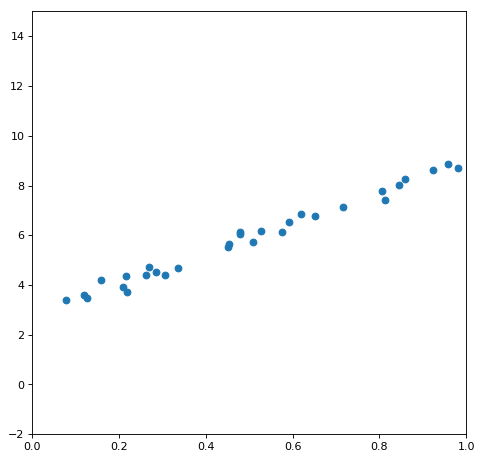

In [3]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [4]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [5]:
resulting_animation

In [6]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('mp4_animations/adam_animation.mp4', writer=writer)

<h6>Adjusting Adam epsilon</h6>
Epsilon of .0001 as mentioned in the DL book did not work. Had to change to .1
<p>The tensorflow documentation hints at using .1 vs. the .001 default</p>
<p>https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/</p>
